## Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

# Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

# Resources:

Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv 

# Procedures:

9.1 Introduction to Matplotlib
9.2 Plotting with Pandas
9.3 Pandas Plotting Subpackage

# Data Analysis:

Provide comments on output from the procedures above.

# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

Create a histogram and KDE of the change from open to close in the price of Facebook stock.

Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

The second subplot will be a bar plot showing the net effect this had monthly, using resample().

Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

# Summary/Conclusion:

Provide a summary of your learnings and the conclusion for this activity.

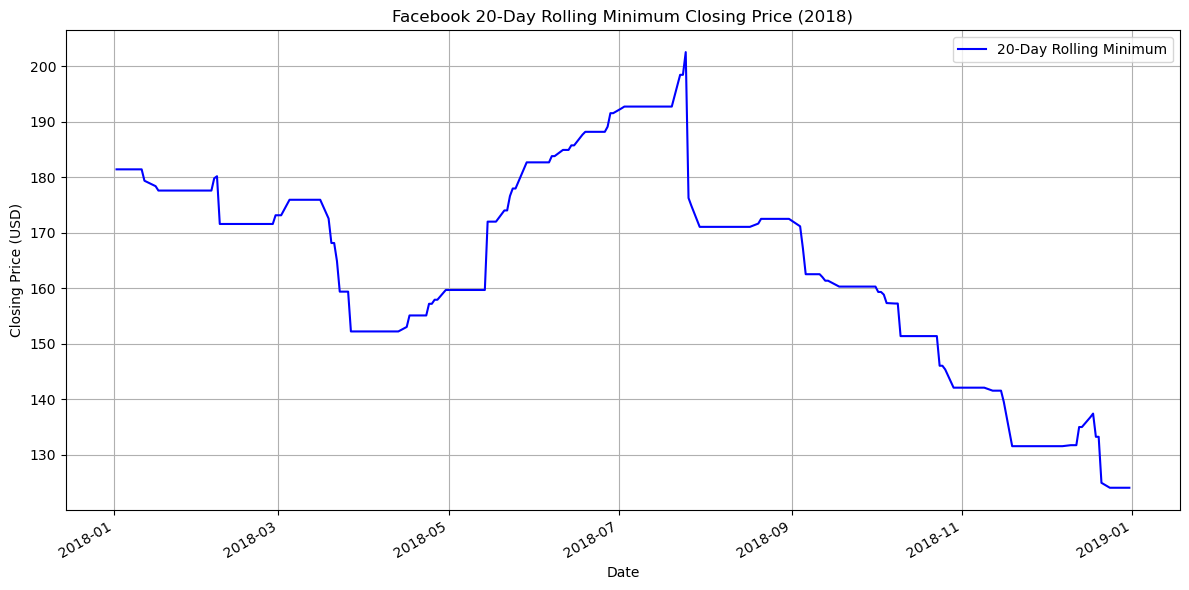

In [44]:
#Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Sort by date in case it's not sorted
df = df.sort_values('date')

# Set date as the index (optional, helps with plotting)
df.set_index('date', inplace=True)

# Calculate the rolling 20-day minimum of the 'close' price
rolling_min = df['close'].rolling(window='20D').min()

# Plot the rolling minimum
plt.figure(figsize=(12, 6))
rolling_min.plot(label='20-Day Rolling Minimum', color='blue')
plt.title("Facebook 20-Day Rolling Minimum Closing Price (2018)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


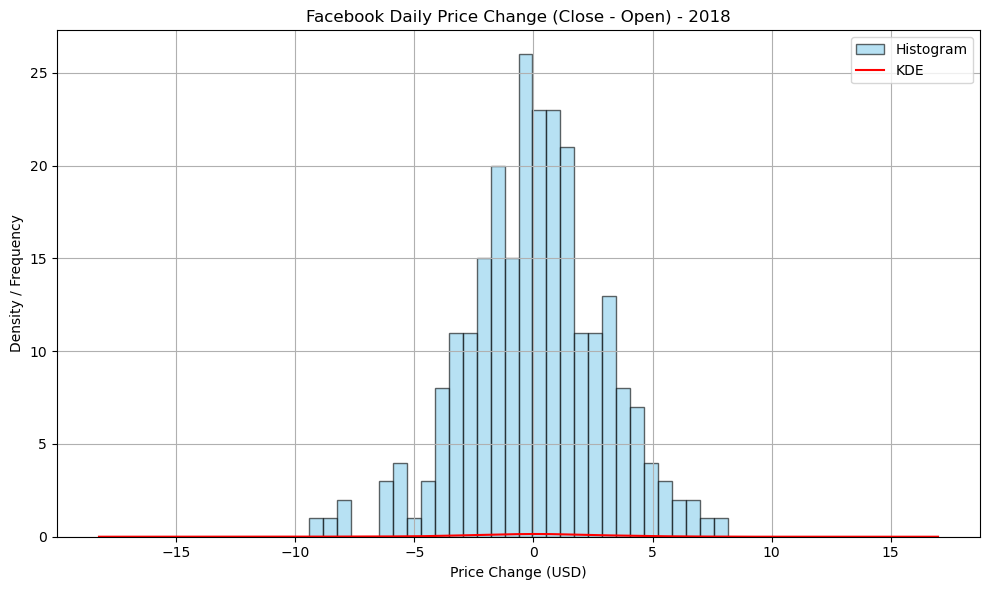

In [28]:
df = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Calculate daily change: close - open
df['daily_change'] = df['close'] - df['open']

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(df['daily_change'], bins=30, color='skyblue', edgecolor='black', alpha=0.6, label='Histogram')

# KDE (Kernel Density Estimate)
df['daily_change'].plot(kind='kde', color='red', label='KDE')

# Titles and labels
plt.title("Facebook Daily Price Change (Close - Open) - 2018")
plt.xlabel("Price Change (USD)")
plt.ylabel("Density / Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


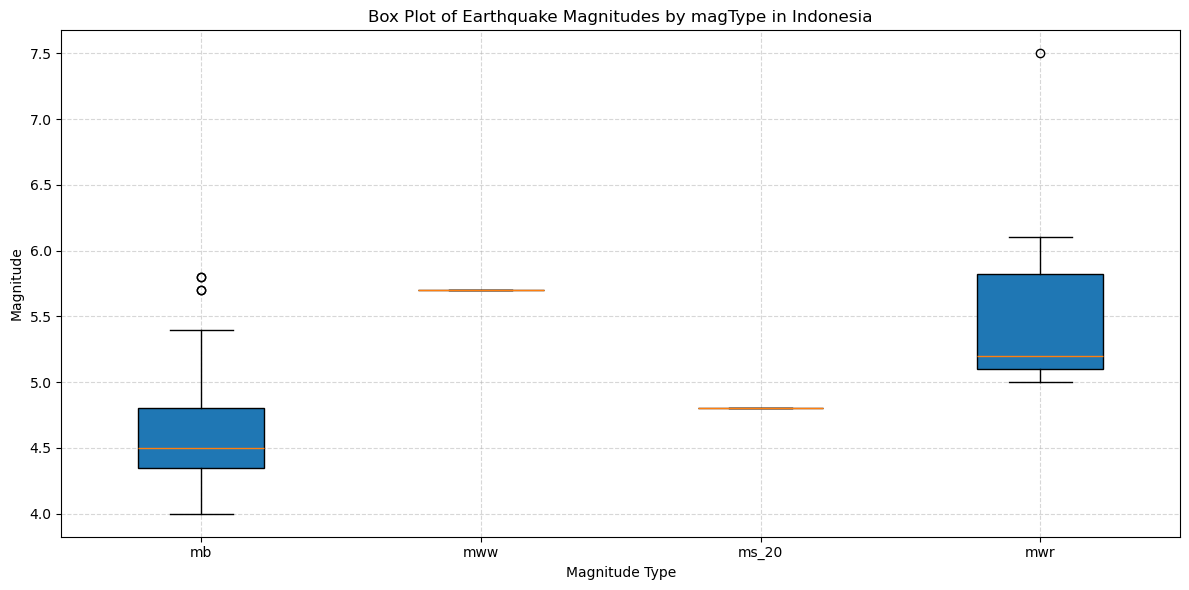

In [46]:
quake = pd.read_csv('earthquakes-1.csv')

# Convert the 'time' column to datetime using pd.to_datetime()
quake['time'] = pd.to_datetime(quake['time'])

# Filter for earthquakes in Indonesia
indo_quakes = quake[quake['parsed_place'].str.contains('Indonesia', case=False, na=False)]

# Drop rows with missing mag or magType
indo_quakes = indo_quakes.dropna(subset=['mag', 'magType'])

# Group magnitudes by magType
grouped = [group['mag'].values for name, group in indo_quakes.groupby('magType')]

# Get list of magTypes in the same order
labels = list(indo_quakes['magType'].unique())

# Create the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, tick_labels=labels, patch_artist=True)

plt.title("Box Plot of Earthquake Magnitudes by magType in Indonesia")
plt.xlabel("Magnitude Type")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


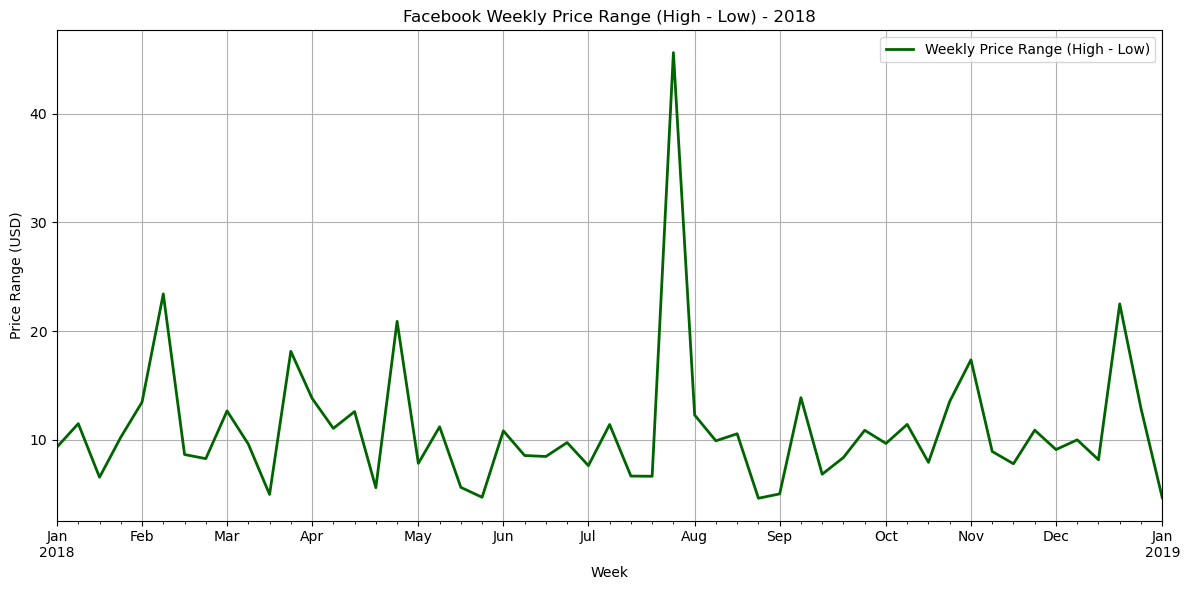

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Set 'date' as the index
fb.set_index('date', inplace=True)

# Resample to weekly frequency and calculate max(high) and min(low)
weekly_high = fb['high'].resample('W').max()
weekly_low = fb['low'].resample('W').min()

# Calculate the weekly range
weekly_range = weekly_high - weekly_low


plt.figure(figsize=(12, 6))
weekly_range.plot(color='darkgreen', linewidth=2, label='Weekly Price Range (High - Low)')

plt.title("Facebook Weekly Price Range (High - Low) - 2018")
plt.xlabel("Week")
plt.ylabel("Price Range (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


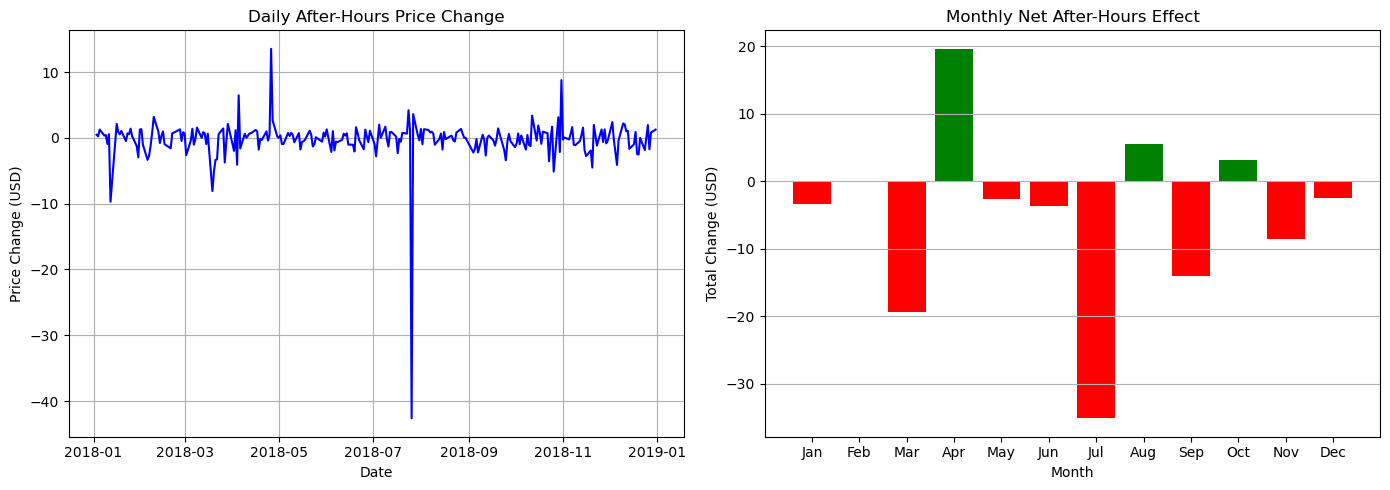

In [50]:

fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'])

# Sort and set index
fb = fb.sort_values('date')
fb.set_index('date', inplace=True)

# Calculate daily after-hours change: today's open - yesterday's close
fb['prior_close'] = fb['close'].shift(1)
fb['after_hours_change'] = fb['open'] - fb['prior_close']

# Prepare monthly net effect
monthly_change = fb['after_hours_change'].resample('ME').sum()

# Bar colors based on gain/loss
bar_colors = ['green' if val >= 0 else 'red' for val in monthly_change]

# Format x-axis labels to show month abbreviation
axes[1].bar(month_labels, monthly_change.values, color=bar_colors)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# plot 1: Line plot of daily after-hours changes
axes[0].plot(fb.index, fb['after_hours_change'], color='blue', label='After-Hours Change')
axes[0].set_title("Daily After-Hours Price Change")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price Change (USD)")
axes[0].grid(True)

# plot 2: Bar plot of monthly net effect
axes[1].bar(month_labels, monthly_change.values, color=bar_colors)
axes[1].set_title("Monthly Net After-Hours Effect")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Change (USD)")
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


## conclusion


This exercise showed me how after-hours trading can affect stock prices. The line plot helped me see daily fluctuations, while the bar plot showed the monthly net effect, making it clear when Facebook had big gains or losses outside of regular trading hours. This kind of analysis is useful for understanding stock market trends and making better investment decisions.